# Becky Davies' Lab 1: Tidy Data

## Loading and Tidying the Data

In [1]:
# Load required pacakages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [2]:
# Import pension dataset for all 50 states
# Skip first six rows because they contain metadata only
pensions = pd.read_csv("C:/Users/Becky/Documents/spacetime/Tidy-Data/2003_2014_pensions.csv", encoding = "ISO-8859-1", skiprows=6)

# View first 10 rows of dataset
pensions.head(10)

,Unnamed: 0,Unnamed: 1,2014,2014.1,2014.2,2014.3,2014.4,2014.5,2013,2013.1,...,2003,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9
0,NaN,State,Liability (Total Pension Liability),Assets (Plan Fiduciary Net Postion),Pension Debt (Net Pension Liability),Funded Ratio,Change in Percent Funded,Funding Rank,Liability,Actuarial Value of Assets,...,Liability,Actuarial Value of Assets,Pension Debt,Funded Ratio,Change in Percent Funded,Funding Rank,Recommended Payment (ARC),Actual Payment,Payment Shortfall,Percent Contributed (Percent of ARC Paid)
1,NaN,Alabama,"47,283,806","33,331,904","13,951,902",70.50%,4.60%,32,"$44,616,643","$29,419,597",...,"$28,767,137","$26,669,981","$2,097,156",92.70%,-4.00%,20,"$398,641","$398,641",$0,100.00%
2,NaN,Alaska,"19,402,488","11,679,592","7,722,897",60.20%,7.80%,45,"$18,779,068","$9,830,273",...,"$10,606,027","$7,371,277","$3,234,750",69.50%,-3.00%,43,"$104,043","$122,921","($18,879)",118.10%
3,NaN,Arizona,"64,345,745","41,440,778","22,904,967",64.40%,-7.30%,40,"$53,313,693","$38,206,174",...,"$28,681,803","$28,518,631","$163,172",99.40%,-8.60%,7,"$199,576","$199,576",$0,100.00%
4,NaN,Arkansas,"28,496,827","24,370,062","4,126,765",85.50%,11.00%,15,"$26,999,917","$20,113,374",...,"$15,494,425","$13,908,370","$1,586,055",89.80%,-5.80%,25,"$336,996","$342,587","($5,591)",101.70%
5,NaN,California,"646,418,986","493,436,931","152,982,055",76.30%,4.10%,25,"$610,304,199","$440,670,471",...,"$310,525,322","$268,702,893","$41,822,429",86.50%,-9.80%,30,"$4,752,542","$4,435,943","$316,599",93.30%
6,NaN,Colorado,"68,848,418","44,229,312","24,619,106",64.20%,2.80%,41,"$66,920,789","$41,122,833",...,"$40,492,108","$30,596,662","$9,895,446",75.60%,-12.80%,38,"$617,827","$426,615","$191,212",69.10%
7,NaN,Connecticut,"53,187,915","26,881,236","26,306,679",50.50%,2.10%,47,"$48,949,911","$23,693,972",...,"$28,114,800","$18,588,700","$9,526,100",66.10%,-2.90%,47,"$657,236","$611,465","$45,771",93.00%
8,NaN,Delaware,"9,925,413","9,169,696","755,717",92.40%,4.20%,9,"$9,262,484","$8,171,825",...,"$5,314,490","$5,340,984","($26,494)",100.50%,-2.20%,5,"$76,136","$67,287","$8,849",88.40%
9,NaN,Florida,"165,559,392","150,107,677","15,451,715",90.70%,9.80%,10,"$163,144,420","$131,900,961",...,"$89,251,331","$101,906,724","($12,655,393)",114.20%,-0.80%,1,"$1,844,203","$1,807,319","$36,884",98.00%


In [3]:
# Delete empty first column
del pensions['Unnamed: 0']
# Rename first column so it is same data type as others
pensions = pensions.rename(columns = {"Unnamed: 1": 1})
# Rename columns to include variable info from first row
pensions.columns = pensions.columns.map(lambda x: str(int(float(x))) + pensions[x].ix[0])
# Remove first row so only values are left
pensions = pensions.drop([0])
# Rename columns to match for all years
pensions = pensions.rename(columns = {"1State":"State", "2014Liability (Total Pension Liability)": "2014Liability",
                                      "2014Assets (Plan Fiduciary Net Postion)": "2014Actuarial Value of Assets", "2014Pension Debt (Net Pension Liability)": "2014Pension Debt"})
pensions.head()

,State,2014Liability,2014Actuarial Value of Assets,2014Pension Debt,2014Funded Ratio,2014Change in Percent Funded,2014Funding Rank,2013Liability,2013Actuarial Value of Assets,2013Pension Debt,...,2003Liability,2003Actuarial Value of Assets,2003Pension Debt,2003Funded Ratio,2003Change in Percent Funded,2003Funding Rank,2003Recommended Payment (ARC),2003Actual Payment,2003Payment Shortfall,2003Percent Contributed (Percent of ARC Paid)
1,Alabama,"47,283,806","33,331,904","13,951,902",70.50%,4.60%,32,"$44,616,643","$29,419,597","$15,197,052",...,"$28,767,137","$26,669,981","$2,097,156",92.70%,-4.00%,20,"$398,641","$398,641",$0,100.00%
2,Alaska,"19,402,488","11,679,592","7,722,897",60.20%,7.80%,45,"$18,779,068","$9,830,273","$8,948,795",...,"$10,606,027","$7,371,277","$3,234,750",69.50%,-3.00%,43,"$104,043","$122,921","($18,879)",118.10%
3,Arizona,"64,345,745","41,440,778","22,904,967",64.40%,-7.30%,40,"$53,313,693","$38,206,174","$15,107,518",...,"$28,681,803","$28,518,631","$163,172",99.40%,-8.60%,7,"$199,576","$199,576",$0,100.00%
4,Arkansas,"28,496,827","24,370,062","4,126,765",85.50%,11.00%,15,"$26,999,917","$20,113,374","$6,886,543",...,"$15,494,425","$13,908,370","$1,586,055",89.80%,-5.80%,25,"$336,996","$342,587","($5,591)",101.70%
5,California,"646,418,986","493,436,931","152,982,055",76.30%,4.10%,25,"$610,304,199","$440,670,471","$169,633,728",...,"$310,525,322","$268,702,893","$41,822,429",86.50%,-9.80%,30,"$4,752,542","$4,435,943","$316,599",93.30%


In [4]:
# Melt dataframe to create column of variables
pensions = pd.melt(pensions, id_vars=['State'])
# Separate year from other variable data
pensions['Year'] = pensions['variable'].apply(lambda y: y[:4])
pensions['measure'] = pensions['variable'].apply(lambda x: x[4:])
# Select out needed columns
pensions = pensions[["State", "value", "Year", "measure"]]

In [5]:
# Pivot to place all measures in top row 
pensions = pensions.groupby('State').apply(pd.DataFrame.pivot,
                                         index = 'Year',
                                         columns='measure',
                                         values='value')
pensions.head()

measure                                                 Actual Payment  \
State                                              Year                  
"Change in Percent Funded Ratio" is the differe... 2003            NaN   
                                                   2004            NaN   
                                                   2005            NaN   
                                                   2006            NaN   
                                                   2007            NaN   

measure                                                 Actuarial Value of Assets  \
State                                              Year                             
"Change in Percent Funded Ratio" is the differe... 2003                       NaN   
                                                   2004                       NaN   
                                                   2005                       NaN   
                                                   2006                       NaN   
                                                   2007                       NaN   

measure                                                 Change in Percent Funded  \
State                                              Year                            
"Change in Percent Funded Ratio" is the differe... 2003                      NaN   
                                                   2004                      NaN   
                                                   2005                      NaN   
                                                   2006                      NaN   
                                                   2007                      NaN   

measure                                                 Funded Ratio  \
State                                              Year                
"Change in Percent Funded Ratio" is the differe... 2003          NaN   
                                                   2004          NaN   
                                                   2005          NaN   
                                                   2006          NaN   
                                                   2007          NaN   

measure                                                 Funding Rank  \
State                                              Year                
"Change in Percent Funded Ratio" is the differe... 2003          NaN   
                                                   2004          NaN   
                                                   2005          NaN   
                                                   2006          NaN   
                                                   2007          NaN   

measure                                                 Liability  \
State                                              Year             
"Change in Percent Funded Ratio" is the differe... 2003       NaN   
                                                   2004       NaN   
                                                   2005       NaN   
                                                   2006       NaN   
                                                   2007       NaN   

measure                                                 Payment Shortfall  \
State                                              Year                     
"Change in Percent Funded Ratio" is the differe... 2003               NaN   
                                                   2004               NaN   
                                                   2005               NaN   
                                                   2006               NaN   
                                                   2007               NaN   

measure                                                 Pension Debt  \
State                                              Year                
"Change in Percent Funded Ratio" is the differe... 2003          NaN   
                                              

In [6]:
# Remove first 12 rows -- contain no data
pensions = pensions[12:]
# Reset index to get correct shape
pensions.reset_index(inplace=True)
pensions.head()

measure,State,Year,Actual Payment,Actuarial Value of Assets,Change in Percent Funded,Funded Ratio,Funding Rank,Liability,Payment Shortfall,Pension Debt,Percent Contributed (Percent of ARC Paid),Recommended Payment (ARC)
0,Alabama,2003,"$398,641","$26,669,981",-4.00%,92.70%,20,"$28,767,137",$0,"$2,097,156",100.00%,"$398,641"
1,Alabama,2004,"$492,181","$27,519,798",-3.10%,89.60%,19,"$30,725,723",$0,"$3,205,925",100.00%,"$492,181"
2,Alabama,2005,"$552,651","$28,439,656",-5.80%,83.70%,23,"$33,961,978",$0,"$5,522,322",100.00%,"$552,651"
3,Alabama,2006,"$684,861","$29,369,328",-1.50%,82.30%,25,"$35,704,256",$0,"$6,334,928",100.00%,"$684,861"
4,Alabama,2007,"$827,408","$30,687,002",-2.90%,79.40%,32,"$38,657,817",$0,"$7,970,815",100.00%,"$827,408"


In [7]:
# Check state names columns for additional erroneous info (metadata caught in the dataframe)
pensions['State'].unique()

array(['Alabama', 'Alaska', 'All $ figures are in thousands', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York',
       "New accounting standards under GASB Statement 67, for the fiscal year ended June 30, 2014, eliminate the ARC.  Oregon\x92s reported contribution uses Actuarially Determined Contributions (ADC) based on the new accounting standards rather than the Actuarially Required Contribution (ARC) based on the old funding standards. As a result, there is no reported 2013 ARC for Oregon Public Employees' Retirement System.",
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island',

In [8]:
# Remove rows that do not contain state data
pensions = pensions[pensions.State != 'All $ figures are in thousands'] 
pensions = pensions[pensions.State != "New accounting standards under GASB Statement 67, for the fiscal year ended June 30, 2014, eliminate the ARC.  Oregon\x92s reported contribution uses Actuarially Determined Contributions (ADC) based on the new accounting standards rather than the Actuarially Required Contribution (ARC) based on the old funding standards. As a result, there is no reported 2013 ARC for Oregon Public Employees' Retirement System."]
pensions.columns.name = ''
# View to check for accuracy
pensions.head()

,State,Year,Actual Payment,Actuarial Value of Assets,Change in Percent Funded,Funded Ratio,Funding Rank,Liability,Payment Shortfall,Pension Debt,Percent Contributed (Percent of ARC Paid),Recommended Payment (ARC)
0,Alabama,2003,"$398,641","$26,669,981",-4.00%,92.70%,20,"$28,767,137",$0,"$2,097,156",100.00%,"$398,641"
1,Alabama,2004,"$492,181","$27,519,798",-3.10%,89.60%,19,"$30,725,723",$0,"$3,205,925",100.00%,"$492,181"
2,Alabama,2005,"$552,651","$28,439,656",-5.80%,83.70%,23,"$33,961,978",$0,"$5,522,322",100.00%,"$552,651"
3,Alabama,2006,"$684,861","$29,369,328",-1.50%,82.30%,25,"$35,704,256",$0,"$6,334,928",100.00%,"$684,861"
4,Alabama,2007,"$827,408","$30,687,002",-2.90%,79.40%,32,"$38,657,817",$0,"$7,970,815",100.00%,"$827,408"


In [9]:
# Final check on end of dataframe
pensions.tail()

,State,Year,Actual Payment,Actuarial Value of Assets,Change in Percent Funded,Funded Ratio,Funding Rank,Liability,Payment Shortfall,Pension Debt,Percent Contributed (Percent of ARC Paid),Recommended Payment (ARC)
631,Wyoming,2010,"$125,721","$6,649,755",-2.90%,85.90%,9,"$7,740,611","$27,252","$1,090,856",82.20%,"$152,973"
632,Wyoming,2011,"$143,650","$6,613,541",-2.90%,83.00%,9,"$7,969,992","$6,456","$1,356,451",95.70%,"$150,105"
633,Wyoming,2012,"$146,353","$6,609,063",-3.40%,79.60%,13,"$8,300,258","$17,789","$1,691,194",89.20%,"$164,142"
634,Wyoming,2013,"$151,701","$7,186,844",-0.90%,78.70%,17,"$9,132,959","$32,950","$1,946,115",82.20%,"$184,651"
635,Wyoming,2014,None,"7,688,940",0.70%,79.40%,21,"9,682,721",None,"1,993,781",None,None


## Data Summary

The *Pensions* dataset used here represents historical pension data for all 50 U.S. states from 2003-2014. It is provided by The Pew Charitable Trusts and can be [downloaded from their website](http://www.pewtrusts.org/en/research-and-analysis/issue-briefs/2016/08/the-state-pension-funding-gap-2014) as an Excel workbook and extracted from a sheet to a csv file (I completed this part manually). Pew published the data as part of an analysis of gaps in state pension funding. The dataset characterizes state pension funds across ten variables including the **Funded Ratio**, which is defined in the associated metadata as 
> Assets (on an actuarial basis) divided by the actuarial accrued liabilities. The funded ratio gives context to a pension system’s fiscal health by expressing how much of the system’s liabilities are currently covered by assets.

The Funded Ratio is derived by dividing the actuarial value of assets by liability:

* a = actuarial value of assets
* L = liability
* F = Funded Ratio

$F = a/L$

The analysis below compares the Funded Ratio for Colorado to that of the US Total.

In [10]:
# Subset data for Colorado and US Total
colorado = pensions[pensions.State == 'Colorado']
us_total = pensions[pensions.State == 'US Total']

In [11]:
# Join subsets
pen = pd.concat([colorado, us_total])
# Check data
pen.head()

,State,Year,Actual Payment,Actuarial Value of Assets,Change in Percent Funded,Funded Ratio,Funding Rank,Liability,Payment Shortfall,Pension Debt,Percent Contributed (Percent of ARC Paid),Recommended Payment (ARC)
72,Colorado,2003,"$426,615","$30,596,662",-12.80%,75.60%,38,"$40,492,108","$191,212","$9,895,446",69.10%,"$617,827"
73,Colorado,2004,"$518,561","$30,755,462",-5.00%,70.60%,41,"$43,570,473","$480,566","$12,815,011",51.90%,"$999,127"
74,Colorado,2005,"$550,548","$34,273,195",2.70%,73.30%,36,"$46,752,295","$565,459","$12,479,100",49.30%,"$1,116,007"
75,Colorado,2006,"$609,853","$36,687,042",0.80%,74.10%,37,"$49,490,604","$369,071","$12,803,562",62.30%,"$978,924"
76,Colorado,2007,"$676,586","$39,415,525",1.00%,75.10%,36,"$52,459,133","$444,483","$13,043,608",60.40%,"$1,121,069"


In [12]:
pen.tail()

,State,Year,Actual Payment,Actuarial Value of Assets,Change in Percent Funded,Funded Ratio,Funding Rank,Liability,Payment Shortfall,Pension Debt,Percent Contributed (Percent of ARC Paid),Recommended Payment (ARC)
547,US Total,2010,"$57,593,717","$2,308,084,443",-2.30%,75.30%,NaN,"$3,065,074,141","$16,087,879","$756,989,698",78.20%,"$73,681,596"
548,US Total,2011,"$64,322,518","$2,353,550,101",-1.40%,73.90%,NaN,"$3,186,287,229","$19,231,021","$832,737,129",77.00%,"$83,553,540"
549,US Total,2012,"$66,606,785","$2,383,987,064",-1.60%,72.30%,NaN,"$3,298,798,385","$20,681,862","$914,811,320",76.30%,"$87,288,647"
550,US Total,2013,"$73,513,657","$2,465,775,276",-0.50%,71.80%,NaN,"$3,434,158,270","$18,427,021","$968,382,999",80.00%,"$91,940,678"
551,US Total,2014,None,"2,768,267,665",3.00%,74.80%,NaN,"3,701,820,064",None,"933,552,398",None,None


In [13]:
# Convert string values to integers for graphing
pen['Year'] = pen['Year'].astype(int)
pen['Funded Ratio'] = pen['Funded Ratio'].replace('%','',regex=True).astype('float')

Examining a graph of the Funded Ratio for Colorado relative to the US average reveals that Colorado's decline mirrors the US average. However, Colorado's initial funded ratio was also much lower than the US average in 2003, and it continues to lag the US average by roughly 11 percentage points.

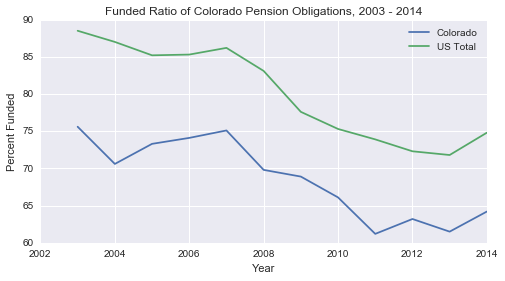

In [14]:
# Graph Colorado and US Total on same plot
groups = pen.groupby('State')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Year'], group['Funded Ratio'], label=name)
ax.legend(loc='best')
plt.title('Funded Ratio of Colorado Pension Obligations, 2003 - 2014')
ax.set_xlabel("Year")
ax.set_ylabel("Percent Funded")
plt.show()   

Cumulatively, US state pension funds are only funded at 75%. Colorado is in even worse shape, with a Funded Ratio of approx. 64%. The time frame covered includes both the Great Recession and the subsequent recovery, during which period the Funded Ratios showed relatively little recovery, indicating more systemic problems with the solvency of Colorado's state pension fund.